In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #seabornない人はpip installしてね
import os
from datetime import datetime
import numpy as np

# カレントディレクトリを.pyと合わせるために以下を実行
from pathlib import Path
if Path.cwd().name == "notebook":
    os.chdir("..")


# 設定
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 500)
pd.set_option('display.max_columns', 500)
# 浮動小数点数を小数点以下3桁で表示するように設定
pd.set_option('display.float_format', '{:.3f}'.format)


In [2]:
# Mac Matplotlibのデフォルトフォントをヒラギノ角ゴシックに設定
plt.rcParams['font.family'] = 'Hiragino Sans'

In [3]:
# Windows MatplotlibのデフォルトフォントをMeiryoに設定
plt.rcParams['font.family'] = 'Meiryo'

In [4]:
# CSVファイルを読み込む
file_path = 'data/input/gacha_history.csv'  # ファイルパスを適切に設定してください
df = pd.read_csv(file_path)

In [5]:
df.describe()

,id,user_uid,mission_type_id,add_ticket
count,1846907.000,1846907.000,1846907.000,1846907.000
mean,923455.459,54507.219,1.111,0.067
std,533157.869,35221.334,1.796,2.750
min,1.000,1.000,0.000,-300.000
25%,461727.500,16238.000,0.000,-1.000
50%,923454.000,60264.000,1.000,1.000
75%,1385182.500,88784.000,1.000,1.000
max,1846993.000,105518.000,14.000,300.000


In [6]:
df.columns

Index(['id', 'user_uid', 'mission_type_id', 'add_ticket',
       'mission_achievement_date', 'get_ticket_date', 'updated_at'],
      dtype='object')

In [7]:
df_admin = df[(df["mission_type_id"]==8) | (df["mission_type_id"]==9)]
df_admin

,id,user_uid,mission_type_id,add_ticket,mission_achievement_date,get_ticket_date,updated_at
555156,555157,38423,8,1,2023-07-31 22:38:10,2023-07-31 22:38:10,2023-07-31 22:38:10
555167,555168,38423,9,1,2023-07-31 22:38:34,2023-07-31 22:38:34,2023-07-31 22:38:34
607088,607089,14129,8,100,2023-08-05 11:55:41,2023-08-05 11:55:41,2023-08-05 11:55:41
672801,672802,41823,8,10,2023-08-11 18:46:20,2023-08-11 18:46:20,2023-08-11 18:46:20
724675,724676,448,8,100,2023-08-17 17:49:41,2023-08-17 17:49:41,2023-08-17 17:49:41
860385,860386,2808,8,300,2023-09-02 12:05:56,2023-09-02 12:05:56,2023-09-02 12:05:56
862674,862675,77745,8,2,2023-09-02 17:13:59,2023-09-02 17:13:59,2023-09-02 17:13:59
868205,868206,2808,8,-300,2023-09-03 08:49:41,2023-09-03 08:49:41,2023-09-03 08:49:41
934497,934498,88467,9,5,2023-09-09 19:57:56,2023-09-09 19:57:56,2023-09-09 19:57:56
977531,977534,5993,8,5,2023-09-14 14:05:13,2023-09-14 14:05:13,2023-09-14 14:05:13


In [8]:
# 日付をdatetime型に変更
df['mission_achievement_date'] = pd.to_datetime(df['mission_achievement_date'], errors='coerce')
df['get_ticket_date'] = pd.to_datetime(df['get_ticket_date'], errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')

# 4月1日以前は削除、mission_type_idの8と9を削除
df = df[(df["mission_type_id"] != 8) & (df["mission_type_id"] != 9) & (df["mission_achievement_date"] >= pd.Timestamp('2023-04-01'))]
df

,id,user_uid,mission_type_id,add_ticket,mission_achievement_date,get_ticket_date,updated_at
68,69,15094,0,-1,2023-04-01 00:00:06,2023-04-01 00:00:06,2023-04-01 00:00:06
69,70,85753,1,1,2023-04-01 00:00:06,2023-04-01 00:00:06,2023-04-01 00:00:06
71,72,15094,0,-1,2023-04-01 00:00:19,2023-04-01 00:00:19,2023-04-01 00:00:19
72,73,15094,0,-2,2023-04-01 00:03:06,2023-04-01 00:03:06,2023-04-01 00:03:06
73,74,17248,1,1,2023-04-01 00:06:49,2023-04-01 00:06:49,2023-04-01 00:06:49
74,75,41033,1,1,2023-04-01 00:06:58,2023-04-01 00:06:58,2023-04-01 00:06:58
77,78,17248,4,5,2023-04-01 00:07:05,2023-04-01 00:07:05,2023-04-01 00:07:05
78,79,17248,0,-7,2023-04-01 00:08:21,2023-04-01 00:08:21,2023-04-01 00:08:21
79,80,85753,0,-1,2023-04-01 00:11:20,2023-04-01 00:11:20,2023-04-01 00:11:20
80,81,85753,0,-1,2023-04-01 00:11:37,2023-04-01 00:11:37,2023-04-01 00:11:37


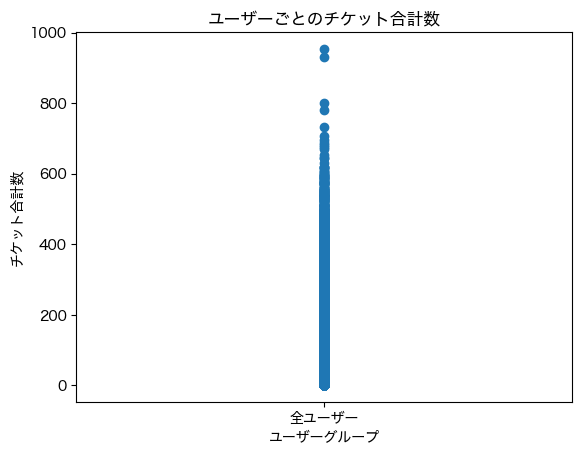

In [9]:
total_tickets_per_user = df.groupby(['user_uid'], observed=True)[
    'add_ticket'].sum()
チケット獲得合計数 = df[df['add_ticket']>0].groupby(['user_uid'], observed=True)[
    'add_ticket'].sum()

# 散布図を描画するためのy座標のみを準備（x座標は必要ない）
y = チケット獲得合計数.values

# 散布図を描画（x座標は全て1として固定）
fig, ax = plt.subplots()
ax.scatter([1] * len(y), y)

ax.set_title('ユーザーごとのチケット合計数')
ax.set_xlabel('ユーザーグループ')
ax.set_ylabel('チケット合計数')

# x軸の目盛りを調整
ax.set_xticks([1])
ax.set_xticklabels(['全ユーザー'])

plt.show()


1 145


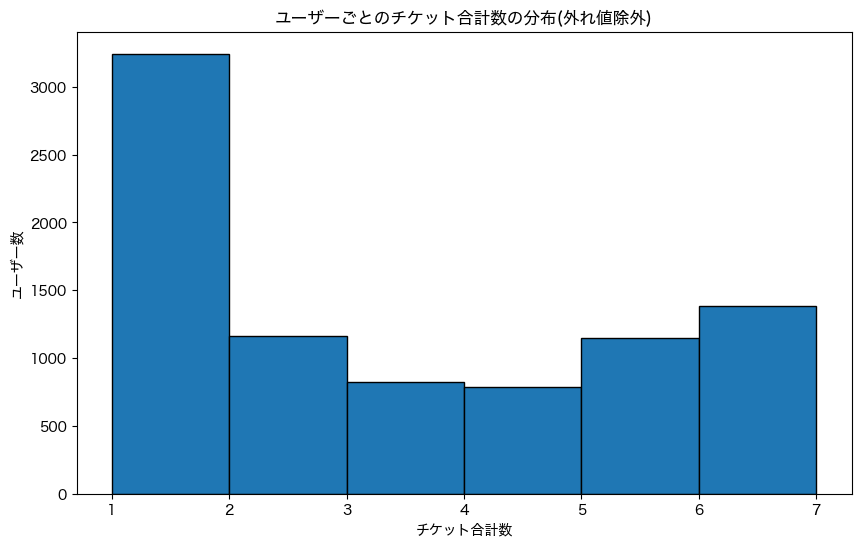

In [10]:
# 第一四分位数（Q1）と第三四分位数（Q3）を計算
Q1 = チケット獲得合計数.quantile(0.25)
Q3 = チケット獲得合計数.quantile(0.75)

# 四分位範囲（IQR）を計算
IQR = Q3 - Q1

# 外れ値の範囲を定義
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 外れ値を除外
filtered_data = チケット獲得合計数[(チケット獲得合計数 >= lower_bound) & (チケット獲得合計数 <= upper_bound)]

# ヒストグラムのビンの数を10分割に設定
bin_count = 6

# チケットの最小値と最大値を取得
min_tickets = min(filtered_data)
max_tickets = max(filtered_data)
print(min_tickets,max_tickets)

# ビンの幅を計算
# bin_width = (max_tickets - min_tickets) / bin_count
bin_width = 1

# ビンの範囲を設定
bins = [min_tickets + i * bin_width for i in range(bin_count + 1)]

# ヒストグラムを描画
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=bins, edgecolor='black')
plt.title('ユーザーごとのチケット合計数の分布(外れ値除外)')
plt.xlabel('チケット合計数')
plt.ylabel('ユーザー数')
# plt.xticks(range(min(total_tickets_per_user), max(total_tickets_per_user) + 1))
plt.show()

In [11]:
# ミッション達成日時ごとの一人当たりの獲得チケット量
average_ticket_by_decade = df.groupby('mission_achievement_date', observed=True)['add_ticket'].mean()
print(average_ticket_by_decade)

# 棒グラフで表示　時間かかるのでコメントアウト
# plt.bar(average_ticket_by_decade.index, average_ticket_by_decade)

mission_achievement_date
2023-04-01 00:00:06     0.000
2023-04-01 00:00:19    -1.000
2023-04-01 00:03:06    -2.000
2023-04-01 00:06:49     1.000
2023-04-01 00:06:58     1.000
2023-04-01 00:07:05     5.000
2023-04-01 00:08:21    -7.000
2023-04-01 00:11:20    -1.000
2023-04-01 00:11:37    -1.000
2023-04-01 00:13:59     1.000
2023-04-01 00:14:05    -1.000
2023-04-01 00:17:14     1.000
2023-04-01 00:17:29     1.000
2023-04-01 00:17:54     5.000
2023-04-01 00:18:12    -1.000
2023-04-01 00:18:19    -7.000
2023-04-01 00:18:26     1.000
2023-04-01 00:18:54     5.000
2023-04-01 00:19:23    -6.000
2023-04-01 00:25:47     1.000
2023-04-01 00:25:59    -1.000
2023-04-01 00:28:47     1.000
2023-04-01 00:28:52    -1.000
2023-04-01 00:32:38     1.000
2023-04-01 00:32:44    -1.000
2023-04-01 00:32:48     3.000
2023-04-01 00:32:57     1.000
2023-04-01 00:33:59     1.000
2023-04-01 00:34:16    -1.000
2023-04-01 00:49:12     1.000
2023-04-01 00:50:37    -2.000
2023-04-01 01:13:08     1.000
2023-04-01 01:1

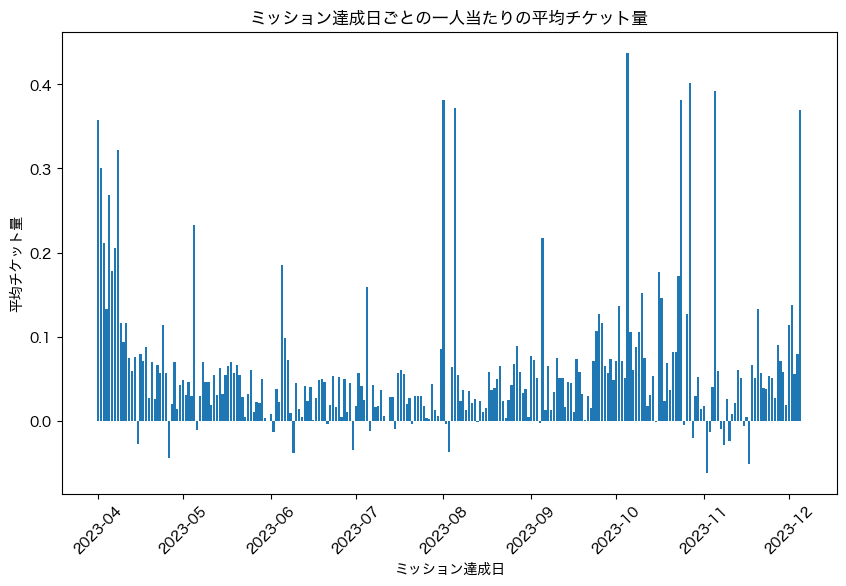

In [12]:
# ミッション達成日時のデータ型を確認し、日付型に変換
df['mission_achievement_date'] = pd.to_datetime(df['mission_achievement_date'])

# ミッション達成日ごとにグループ化して一人当たりの平均チケット量を計算
# 日時データから日付のみを抽出
df['mission_achievement_date'] = df['mission_achievement_date'].dt.date

average_ticket_by_date = df.groupby('mission_achievement_date')['add_ticket'].mean()
# print(average_ticket_by_date)

# 棒グラフで表示
plt.figure(figsize=(10, 6))
plt.bar(average_ticket_by_date.index, average_ticket_by_date)
plt.title('ミッション達成日ごとの一人当たりの平均チケット量')
plt.xlabel('ミッション達成日')
plt.ylabel('平均チケット量')
plt.xticks(rotation=45)
plt.show()

In [13]:
# mission_type_id 毎の数を算出
# 棒グラフにプロット

n_mission_type_id = df["mission_type_id"].value_counts().sort_index()
print(n_mission_type_id)

mission_type_id
0     772216
1     757368
2      85717
3      79037
4      50853
5      76887
11      2931
12     15494
14      5599
Name: count, dtype: int64


・mission_type_idの6（古紙の持込重量ミッション(来月)）,10（チケット条件一致付与(メール)）がない  
・7と13はそもそも存在しない  

・このあたりのデータは削除でよいのではないか

ガチャの効果を測定する  
・ガチャとリサイクル量の相関  
・ログインとリサイクル量の相関

# 以降、結合を試しています

In [14]:
# user_info とidを紐づけ（試し）
file_path_user_info = 'data/input/user_info_cleansing.csv'  # ファイルパスを適切に設定してください
df_user_info = pd.read_csv(file_path_user_info)
df_user_info.head()

,Unnamed: 0,id,nickname,club_coin,recycle_point,total_recycle_amount,recycle_amount_per_year,recycle_amount_after_gold_member,rank_continuation_class,gender,birth_day,zipcode
0,3,100000,きょうこ,755.000,0.000,119.000,119.000,0.000,0,女,1969-04-13 00:00:00,3111535.000
1,4,100001,あみ,168.000,168.000,53.000,53.000,0.000,1,無回答,1985-12-24 00:00:00,9830005.000
2,5,100002,ちゃちゃしめ,564.000,7.000,20.800,20.800,0.000,0,女,1986-11-23 00:00:00,9891202.000
3,6,100003,桜小路小梅,38.000,0.000,8.000,8.000,0.000,0,女,1992-12-09 00:00:00,9813109.000
4,7,100004,はるさん,2.000,6.000,2.700,2.700,0.000,0,男,1998-02-03 00:00:00,NaN


In [15]:
# birth_dayをdatetimeに変換し、年代を計算
df_user_info['birth_day'] = pd.to_datetime(df_user_info['birth_day'], errors='coerce')
current_year = pd.Timestamp.now().year
df_user_info['age'] = current_year - df_user_info['birth_day'].dt.year
# 年齢と性別が欠損している行を削除
data_age_gender = df_user_info.dropna(subset=['age', 'gender']).copy()
# 年齢を年代に変換
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_user_info['age_group'] = pd.cut(df_user_info['age'], bins=bins, labels=labels, right=False)

In [16]:
# チケット獲得合計数.name = 'チケット獲得合計数'
tempDf = チケット獲得合計数.to_frame()
tempDf.rename(columns={'add_ticket': 'チケット獲得合計数'}, inplace=True)
tempDf = tempDf.reset_index()

# display(tempDf)

df_user_info = pd.merge(df_user_info, tempDf, left_on='id', right_on='user_uid', how='left')

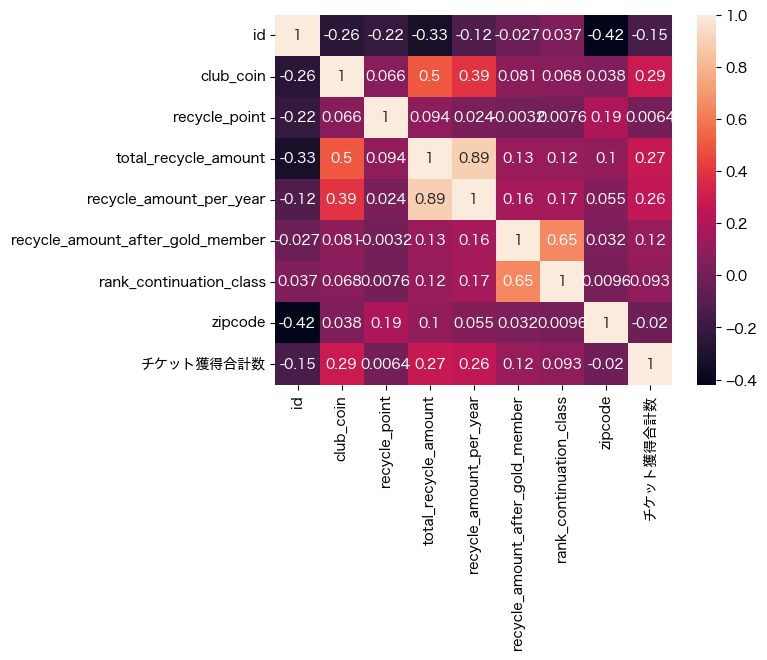

In [17]:
# カラムを選択して相関係数を算出
selected_columns = ['id', 'club_coin', 'recycle_point',
       'total_recycle_amount', 'recycle_amount_per_year',
       'recycle_amount_after_gold_member', 'rank_continuation_class','zipcode', 'チケット獲得合計数']
correlation_matrix = df_user_info[selected_columns].corr()

# チケット獲得合計数とリサイクル量・リサイクル頻度の相関を確認するためのヒートマップ
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [18]:
# 横軸を対数に変換した散布図行列を表示
df_user_info = df_user_info[df_user_info['チケット獲得合計数'] > 0 ]

# 対数変換を行いたいカラムを選択
columns = ['total_recycle_amount', 'recycle_amount_per_year', 'チケット獲得合計数']

# 対数変換を行うラムダ式を定義し、適用
df_user_info['log_total_recycle_amount'] = df_user_info['total_recycle_amount'].apply(lambda x: np.log10(x) if (x > 0) else x)
df_user_info['log_recycle_amount_per_year'] = df_user_info['recycle_amount_per_year'].apply(lambda x: np.log10(x) if (x > 0) else x)
df_user_info['log_チケット獲得合計数'] = df_user_info['チケット獲得合計数'].apply(lambda x: np.log10(x) if (x > 0) else x)

df_user_info.describe()

,Unnamed: 0,id,club_coin,recycle_point,total_recycle_amount,recycle_amount_per_year,recycle_amount_after_gold_member,rank_continuation_class,birth_day,zipcode,age,user_uid,チケット獲得合計数,log_total_recycle_amount,log_recycle_amount_per_year,log_チケット獲得合計数
count,23748.000,23748.000,23748.000,23748.000,23748.000,23748.000,23748.000,23748.000,16854,22736.000,16854.000,23748.000,23748.000,23748.000,23748.000,23748.000
mean,56630.053,62481.317,896.898,12.832,181.001,121.318,3.772,0.483,1970-12-16 19:47:42.228551084,6689685.120,52.533,62481.317,65.967,1.932,1.807,1.296
min,3.000,72.000,0.000,0.000,0.000,0.000,0.000,0.000,1922-02-02 00:00:00,1167189.000,2.000,72.000,1.000,-0.187,-0.187,0.000
25%,26969.250,31245.250,109.000,0.000,36.000,31.000,0.000,0.000,1962-09-08 06:00:00,3160021.000,45.000,31245.250,6.000,1.556,1.491,0.778
50%,63058.000,72685.000,412.000,0.000,97.000,80.000,0.000,0.000,1970-05-03 00:00:00,9608055.000,53.000,72685.000,19.000,1.987,1.903,1.279
75%,87230.750,92865.250,1399.000,0.000,222.000,156.000,0.000,1.000,1978-07-29 00:00:00,9813203.000,61.000,92865.250,71.000,2.346,2.193,1.851
max,99818.000,105512.000,51900.000,3614.000,16880.000,12640.000,149.700,5.000,2021-12-27 00:00:00,9996401.000,101.000,105512.000,954.000,4.227,4.102,2.980
std,32881.308,33743.965,1371.077,60.347,345.846,228.505,17.077,0.871,NaN,3307832.657,11.918,33743.965,102.701,0.572,0.554,0.740


#### TODO: リサイクル量ではなくリサイクル回数でも相関出してみよう

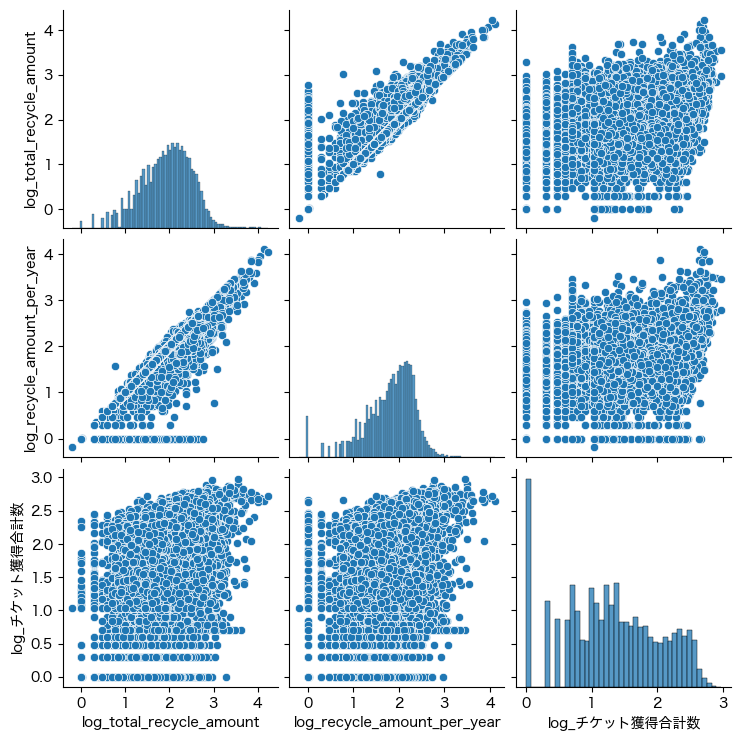

In [19]:
# # 対数変換されたカラムで散布図行列を表示
log_columns = ['log_total_recycle_amount','log_recycle_amount_per_year','log_チケット獲得合計数']
sns.pairplot(df_user_info[log_columns])

常用対数をとったが相関は見られず  
ヒストグラム：totalもper_yearも10^2=100kg が多い  
新聞が1部220gだとすると、1年で約80kg  
段ボール1個150gだとすると、残り20kgすべて段ボールと仮定すると133個/year  
広告・チラシを含めれば年間100kgになるか  
→これに関してSK様に肌感覚的なことも聞きたい  

per_year vs. totalの点がy>xに多い（totalの方がper_yearより多い）

In [20]:
# merge (左外部結合)
df_merge = pd.merge(df, df_user_info, left_on='user_uid', right_on='id', how='left')

In [21]:
display(df_merge.head(100))
display(df_merge.describe())
#print(len(df_merge["user_uid"].unique()))
#print(df_merge.info(verbose=True, show_counts=True))
print(df_merge['nickname'].isna().sum())

,id_x,user_uid_x,mission_type_id,add_ticket,mission_achievement_date,get_ticket_date,updated_at,Unnamed: 0,id_y,nickname,club_coin,recycle_point,total_recycle_amount,recycle_amount_per_year,recycle_amount_after_gold_member,rank_continuation_class,gender,birth_day,zipcode,age,age_group,user_uid_y,チケット獲得合計数,log_total_recycle_amount,log_recycle_amount_per_year,log_チケット獲得合計数
0,69,15094,0,-1,2023-04-01,2023-04-01 00:00:06,2023-04-01 00:00:06,10994.000,15094.000,ちびちびむう,190.000,0.000,555.000,326.000,0.000,0.000,女,1960-11-19,9630201.000,63.000,61-70,15094.000,141.000,2.744,2.513,2.149
1,70,85753,1,1,2023-04-01,2023-04-01 00:00:06,2023-04-01 00:00:06,84186.000,85753.000,真由美ママ,80.000,0.000,78.000,78.000,0.000,1.000,女,NaT,3230028.000,NaN,NaN,85753.000,1.000,1.892,1.892,0.000
2,72,15094,0,-1,2023-04-01,2023-04-01 00:00:19,2023-04-01 00:00:19,10994.000,15094.000,ちびちびむう,190.000,0.000,555.000,326.000,0.000,0.000,女,1960-11-19,9630201.000,63.000,61-70,15094.000,141.000,2.744,2.513,2.149
3,73,15094,0,-2,2023-04-01,2023-04-01 00:03:06,2023-04-01 00:03:06,10994.000,15094.000,ちびちびむう,190.000,0.000,555.000,326.000,0.000,0.000,女,1960-11-19,9630201.000,63.000,61-70,15094.000,141.000,2.744,2.513,2.149
4,74,17248,1,1,2023-04-01,2023-04-01 00:06:49,2023-04-01 00:06:49,13211.000,17248.000,サイサイサイ,982.000,0.000,992.000,524.000,0.000,0.000,男,1982-10-09,9870601.000,41.000,41-50,17248.000,393.000,2.997,2.719,2.594
5,75,41033,1,1,2023-04-01,2023-04-01 00:06:58,2023-04-01 00:06:58,37910.000,41033.000,なな,286.000,0.000,186.000,127.000,0.000,1.000,女,1964-05-18,9920035.000,59.000,51-60,41033.000,143.000,2.270,2.104,2.155
6,78,17248,4,5,2023-04-01,2023-04-01 00:07:05,2023-04-01 00:07:05,13211.000,17248.000,サイサイサイ,982.000,0.000,992.000,524.000,0.000,0.000,男,1982-10-09,9870601.000,41.000,41-50,17248.000,393.000,2.997,2.719,2.594
7,79,17248,0,-7,2023-04-01,2023-04-01 00:08:21,2023-04-01 00:08:21,13211.000,17248.000,サイサイサイ,982.000,0.000,992.000,524.000,0.000,0.000,男,1982-10-09,9870601.000,41.000,41-50,17248.000,393.000,2.997,2.719,2.594
8,80,85753,0,-1,2023-04-01,2023-04-01 00:11:20,2023-04-01 00:11:20,84186.000,85753.000,真由美ママ,80.000,0.000,78.000,78.000,0.000,1.000,女,NaT,3230028.000,NaN,NaN,85753.000,1.000,1.892,1.892,0.000
9,81,85753,0,-1,2023-04-01,2023-04-01 00:11:37,2023-04-01 00:11:37,84186.000,85753.000,真由美ママ,80.000,0.000,78.000,78.000,0.000,1.000,女,NaT,3230028.000,NaN,NaN,85753.000,1.000,1.892,1.892,0.000


,id_x,user_uid_x,mission_type_id,add_ticket,get_ticket_date,updated_at,Unnamed: 0,id_y,club_coin,recycle_point,total_recycle_amount,recycle_amount_per_year,recycle_amount_after_gold_member,rank_continuation_class,birth_day,zipcode,age,user_uid_y,チケット獲得合計数,log_total_recycle_amount,log_recycle_amount_per_year,log_チケット獲得合計数
count,1846102.000,1846102.000,1846102.000,1846102.000,1846102,1846102,1804109.000,1804109.000,1804109.000,1804109.000,1804109.000,1804109.000,1804109.000,1804109.000,1296351,1740603.000,1296351.000,1804109.000,1804109.000,1804109.000,1804109.000,1804109.000
mean,923847.591,54511.822,1.111,0.067,2023-09-01 01:17:33.000484608,2023-09-01 01:17:33.066670592,58504.617,53865.843,1547.708,13.285,320.594,206.286,7.165,0.610,1969-02-28 10:57:37.166461860,6464773.461,54.326,53865.843,250.169,2.199,2.060,2.281
min,69.000,1.000,0.000,-10.000,2023-04-01 00:00:06,2023-04-01 00:00:06,3.000,72.000,0.000,0.000,0.000,0.000,0.000,0.000,1922-02-02 00:00:00,1167189.000,2.000,72.000,1.000,-0.187,-0.187,0.000
25%,462314.250,16238.000,0.000,-1.000,2023-07-18 23:14:46.249999872,2023-07-18 23:14:46.249999872,31220.000,15512.000,271.000,0.000,74.000,65.000,0.000,0.000,1962-02-01 00:00:00,3150001.000,48.000,15512.000,145.000,1.869,1.813,2.161
50%,923847.500,60264.000,1.000,1.000,2023-09-08 16:34:42.500000,2023-09-08 16:34:42.500000,64263.000,59583.000,614.000,0.000,181.000,136.000,0.000,0.000,1968-05-03 00:00:00,9600101.000,55.000,59583.000,247.000,2.258,2.134,2.393
75%,1385381.750,88815.000,1.000,1.000,2023-10-24 08:32:30.249999872,2023-10-24 08:32:30.249999872,86781.000,88378.000,2142.000,0.000,370.000,218.000,0.000,1.000,1975-04-24 00:00:00,9810952.000,61.000,88378.000,344.000,2.568,2.338,2.537
max,1846993.000,105518.000,14.000,50.000,2023-12-05 06:54:38,2023-12-05 06:54:38,99818.000,105512.000,51900.000,3614.000,16880.000,12640.000,149.700,5.000,2021-12-27 00:00:00,9996401.000,101.000,105512.000,954.000,4.227,4.102,2.980
std,532933.838,35222.582,1.796,2.730,NaN,NaN,30889.873,35129.206,2270.124,58.564,667.051,451.780,22.591,1.063,NaN,3312747.848,10.605,35129.206,141.576,0.530,0.484,0.404


42510


・user_info は最近やってなかったユーザーを消しているのか？  
・user_info は宮城県で絞ってないか？  
-> user_infoをどのように抽出したかの詳細を聞く必要がある

In [22]:
# # userIdごとのレコードの出現回数を取得
# record_counts = df_merge.groupby('user_uid_x').size().reset_index(name='record_count')
# record_counts

In [23]:
# アクティブユーザーと見なされる最小出現回数
threshold = 10

# 'user_id'の出現回数をカウント
user_counts = df_merge['user_uid_x'].value_counts()

# アクティブユーザーを識別
df_merge['アクティブユーザ'] = df_merge['user_uid_x'].apply(lambda x: 1 if (user_counts[x] >= threshold) else 0)


In [24]:
df_merge.head()

,id_x,user_uid_x,mission_type_id,add_ticket,mission_achievement_date,get_ticket_date,updated_at,Unnamed: 0,id_y,nickname,club_coin,recycle_point,total_recycle_amount,recycle_amount_per_year,recycle_amount_after_gold_member,rank_continuation_class,gender,birth_day,zipcode,age,age_group,user_uid_y,チケット獲得合計数,log_total_recycle_amount,log_recycle_amount_per_year,log_チケット獲得合計数,アクティブユーザ
0,69,15094,0,-1,2023-04-01,2023-04-01 00:00:06,2023-04-01 00:00:06,10994.000,15094.000,ちびちびむう,190.000,0.000,555.000,326.000,0.000,0.000,女,1960-11-19,9630201.000,63.000,61-70,15094.000,141.000,2.744,2.513,2.149,1
1,70,85753,1,1,2023-04-01,2023-04-01 00:00:06,2023-04-01 00:00:06,84186.000,85753.000,真由美ママ,80.000,0.000,78.000,78.000,0.000,1.000,女,NaT,3230028.000,NaN,NaN,85753.000,1.000,1.892,1.892,0.000,0
2,72,15094,0,-1,2023-04-01,2023-04-01 00:00:19,2023-04-01 00:00:19,10994.000,15094.000,ちびちびむう,190.000,0.000,555.000,326.000,0.000,0.000,女,1960-11-19,9630201.000,63.000,61-70,15094.000,141.000,2.744,2.513,2.149,1
3,73,15094,0,-2,2023-04-01,2023-04-01 00:03:06,2023-04-01 00:03:06,10994.000,15094.000,ちびちびむう,190.000,0.000,555.000,326.000,0.000,0.000,女,1960-11-19,9630201.000,63.000,61-70,15094.000,141.000,2.744,2.513,2.149,1
4,74,17248,1,1,2023-04-01,2023-04-01 00:06:49,2023-04-01 00:06:49,13211.000,17248.000,サイサイサイ,982.000,0.000,992.000,524.000,0.000,0.000,男,1982-10-09,9870601.000,41.000,41-50,17248.000,393.000,2.997,2.719,2.594,1


In [25]:
#columns = ['アクティブユーザ','total_recycle_amount','recycle_amount_per_year', 'チケット獲得合計数']
# total_recycle_amountが５０００以上を除外した場合
#sns.pairplot(df_merge[df_merge['total_recycle_amount']<5000][columns],hue='アクティブユーザ')

# アクティブユーザーごとの相関を出したかったが、うまく定義できず中断
# 一応コードは残してます。

In [26]:
# 年代ごとのチケット獲得枚数合計を算出
年代ごとのチケット獲得枚数合計 = df_merge[df_merge['add_ticket']>0].groupby('age_group')['add_ticket'].sum()
年代ごとのチケット獲得枚数平均 = df_merge[df_merge['add_ticket']>0].groupby('age_group')['add_ticket'].mean()

/var/folders/hy/9l6lqt09175d4gkkmbfq_w3c0000gn/T/ipykernel_8717/4242263181.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  年代ごとのチケット獲得枚数合計 = df_merge[df_merge['add_ticket']>0].groupby('age_group')['add_ticket'].sum()
/var/folders/hy/9l6lqt09175d4gkkmbfq_w3c0000gn/T/ipykernel_8717/4242263181.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  年代ごとのチケット獲得枚数平均 = df_merge[df_merge['add_ticket']>0].groupby('age_group')['add_ticket'].mean()


In [27]:
年代ごとのチケット獲得枚数平均

age_group
0-20     1.613
21-30    1.686
31-40    1.543
41-50    1.509
51-60    1.482
61-70    1.499
71-80    1.558
81-90    1.514
91-100   5.042
Name: add_ticket, dtype: float64

・年齢ごとに大きな差は見受けられなかった。。。

In [28]:
# 年代ごとのチケット利用枚数合計を算出
年代ごとのチケット利用枚数合計 = df_merge[df_merge['add_ticket']<0].groupby('age_group')['add_ticket'].sum()
年代ごとのチケット利用枚数平均 = df_merge[df_merge['add_ticket']<0].groupby('age_group')['add_ticket'].mean()

/var/folders/hy/9l6lqt09175d4gkkmbfq_w3c0000gn/T/ipykernel_8717/1887662310.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  年代ごとのチケット利用枚数合計 = df_merge[df_merge['add_ticket']<0].groupby('age_group')['add_ticket'].sum()
/var/folders/hy/9l6lqt09175d4gkkmbfq_w3c0000gn/T/ipykernel_8717/1887662310.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  年代ごとのチケット利用枚数平均 = df_merge[df_merge['add_ticket']<0].groupby('age_group')['add_ticket'].mean()


In [29]:
年代ごとのチケット利用枚数平均

age_group
0-20     -2.252
21-30    -2.506
31-40    -2.358
41-50    -2.175
51-60    -1.852
61-70    -1.725
71-80    -1.668
81-90    -1.881
91-100   -4.840
Name: add_ticket, dtype: float64

In [30]:
a = df_merge[df_merge['add_ticket']>0].sort_values("user_uid_x")
a[a['user_uid_x']==88]

,id_x,user_uid_x,mission_type_id,add_ticket,mission_achievement_date,get_ticket_date,updated_at,Unnamed: 0,id_y,nickname,club_coin,recycle_point,total_recycle_amount,recycle_amount_per_year,recycle_amount_after_gold_member,rank_continuation_class,gender,birth_day,zipcode,age,age_group,user_uid_y,チケット獲得合計数,log_total_recycle_amount,log_recycle_amount_per_year,log_チケット獲得合計数,アクティブユーザ
243535,244324,88,4,5,2023-06-11,2023-06-11 05:35:26,2023-06-11 05:35:26,86589.000,88.000,ずんぼ,1014.000,192.000,1443.000,292.200,0.000,0.000,男,1959-08-14,9811102.000,64.000,61-70,88.000,23.000,3.159,2.466,1.362,1
243536,244325,88,5,1,2023-06-11,2023-06-11 05:35:26,2023-06-11 05:35:26,86589.000,88.000,ずんぼ,1014.000,192.000,1443.000,292.200,0.000,0.000,男,1959-08-14,9811102.000,64.000,61-70,88.000,23.000,3.159,2.466,1.362,1
618551,619343,88,4,5,2023-08-06,2023-08-06 07:49:10,2023-08-06 07:49:10,86589.000,88.000,ずんぼ,1014.000,192.000,1443.000,292.200,0.000,0.000,男,1959-08-14,9811102.000,64.000,61-70,88.000,23.000,3.159,2.466,1.362,1
13330,14119,88,1,1,2023-04-09,2023-04-09 08:06:11,2023-04-09 08:06:11,86589.000,88.000,ずんぼ,1014.000,192.000,1443.000,292.200,0.000,0.000,男,1959-08-14,9811102.000,64.000,61-70,88.000,23.000,3.159,2.466,1.362,1
13331,14120,88,2,1,2023-04-06,2023-04-09 08:06:17,2023-04-09 08:06:17,86589.000,88.000,ずんぼ,1014.000,192.000,1443.000,292.200,0.000,0.000,男,1959-08-14,9811102.000,64.000,61-70,88.000,23.000,3.159,2.466,1.362,1
13332,14121,88,4,5,2023-04-09,2023-04-09 08:06:27,2023-04-09 08:06:27,86589.000,88.000,ずんぼ,1014.000,192.000,1443.000,292.200,0.000,0.000,男,1959-08-14,9811102.000,64.000,61-70,88.000,23.000,3.159,2.466,1.362,1
766374,767168,88,2,2,2023-08-19,2023-08-22 18:17:56,2023-08-22 18:17:56,86589.000,88.000,ずんぼ,1014.000,192.000,1443.000,292.200,0.000,0.000,男,1959-08-14,9811102.000,64.000,61-70,88.000,23.000,3.159,2.466,1.362,1
766373,767167,88,1,1,2023-08-22,2023-08-22 18:17:51,2023-08-22 18:17:51,86589.000,88.000,ずんぼ,1014.000,192.000,1443.000,292.200,0.000,0.000,男,1959-08-14,9811102.000,64.000,61-70,88.000,23.000,3.159,2.466,1.362,1
618547,619339,88,1,1,2023-08-06,2023-08-06 07:49:01,2023-08-06 07:49:01,86589.000,88.000,ずんぼ,1014.000,192.000,1443.000,292.200,0.000,0.000,男,1959-08-14,9811102.000,64.000,61-70,88.000,23.000,3.159,2.466,1.362,1
243531,244320,88,1,1,2023-06-11,2023-06-11 05:35:09,2023-06-11 05:35:09,86589.000,88.000,ずんぼ,1014.000,192.000,1443.000,292.200,0.000,0.000,男,1959-08-14,9811102.000,64.000,61-70,88.000,23.000,3.159,2.466,1.362,1


In [31]:
# ユーザーごとに分けて獲得枚数履歴を取得

# grouped_age_user = df_merge[(df_merge['add_ticket']>0) & (df_merge['age_group'].notna())].groupby(['age_group', 'user_uid_x'])['add_ticket'].apply(lambda x: x)
grouped_age_user = df_merge[(df_merge['add_ticket']>0) & (df_merge['age_group'].notna())].groupby(['age_group', 'user_uid_x'])['add_ticket'].sum()
grouped_age_user = grouped_age_user.reset_index()
grouped_age_user = grouped_age_user[grouped_age_user['add_ticket'] != 0]

/var/folders/hy/9l6lqt09175d4gkkmbfq_w3c0000gn/T/ipykernel_8717/2302530876.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age_user = df_merge[(df_merge['add_ticket']>0) & (df_merge['age_group'].notna())].groupby(['age_group', 'user_uid_x'])['add_ticket'].sum()


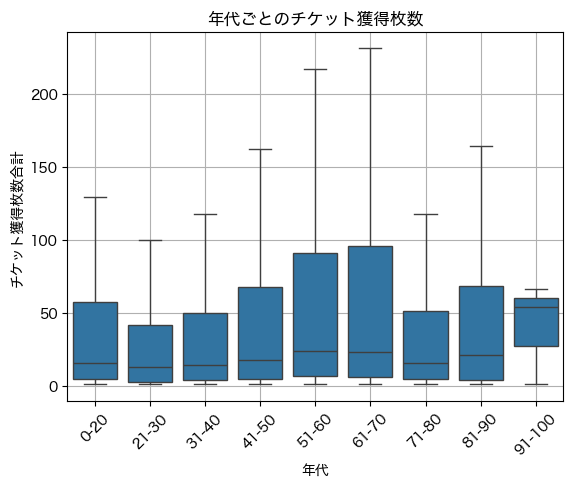

In [32]:
fig, ax = plt.subplots()

sns.boxplot(x='age_group', y='add_ticket', data=grouped_age_user, showfliers=False)
plt.title('年代ごとのチケット獲得枚数')
plt.xlabel('年代')
plt.ylabel('チケット獲得枚数合計')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

/var/folders/hy/9l6lqt09175d4gkkmbfq_w3c0000gn/T/ipykernel_8717/1357237074.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age_user = df_merge[(df_merge['add_ticket']<0) & (df_merge['age_group'].notna())].groupby(['age_group', 'user_uid_x'])['add_ticket'].sum()


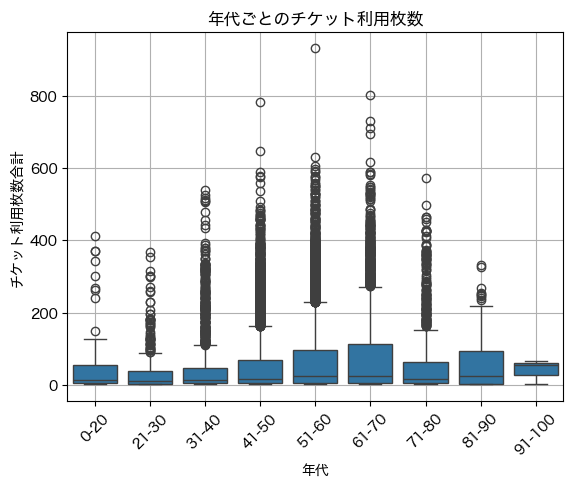

In [33]:
# ユーザーごとに分けて利用枚数合計を算出
grouped_age_user = df_merge[(df_merge['add_ticket']<0) & (df_merge['age_group'].notna())].groupby(['age_group', 'user_uid_x'])['add_ticket'].sum()
grouped_age_user = grouped_age_user.reset_index()
grouped_age_user = grouped_age_user[grouped_age_user['add_ticket'] != 0]
grouped_age_user['add_ticket'] = grouped_age_user['add_ticket'] * -1


fig, ax = plt.subplots()

sns.boxplot(x='age_group', y='add_ticket', data=grouped_age_user, showfliers=True)
plt.title('年代ごとのチケット利用枚数')
plt.xlabel('年代')
plt.ylabel('チケット利用枚数合計')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [34]:
# 上のデータを基に最頻値を算出

In [35]:
# ミッションタイプごとのチケット獲得量の集計
ticket_per_mission_type = df.groupby('mission_type_id')['add_ticket'].sum()
ticket_per_mission_type

mission_type_id
0    -1481390
1      757368
2      138489
3       79037
4      272964
5      123391
11      29310
12     154940
14      49296
Name: add_ticket, dtype: int64

In [36]:
# 年代とミッションタイプごとのチケット獲得量の集計
ticket_per_age_mission = df_merge.groupby(['age_group', 'mission_type_id'], observed=True)['add_ticket'].sum().unstack()
ticket_per_age_mission

mission_type_id,0,1,2,3,4,5,11,12,14
age_group,,,,,,,,,
0-20,-4633.000,2199.000,424.000,138.000,810.000,359.000,70.000,530.000,435.000
21-30,-14553.000,6633.000,1025.000,659.000,2448.000,945.000,370.000,2270.000,1490.000
31-40,-81057.000,41592.000,7419.000,3916.000,13991.000,6131.000,1690.000,10560.000,4840.000
41-50,-223037.000,113390.000,21092.000,11332.000,41326.000,17763.000,4610.000,22400.000,9740.000
51-60,-393450.000,202385.000,36760.000,23405.000,73815.000,33148.000,7600.000,35820.000,13155.000
61-70,-263299.000,132504.000,26233.000,14891.000,50114.000,22869.000,5130.000,23140.000,9620.000
71-80,-52806.000,26545.000,5250.000,2213.000,11220.000,4782.000,850.000,5390.000,2525.000
81-90,-5659.000,2980.000,427.000,292.000,975.000,509.000,130.000,580.000,310.000
91-100,-121.000,9.000,7.000,NaN,29.000,1.000,NaN,20.000,55.000


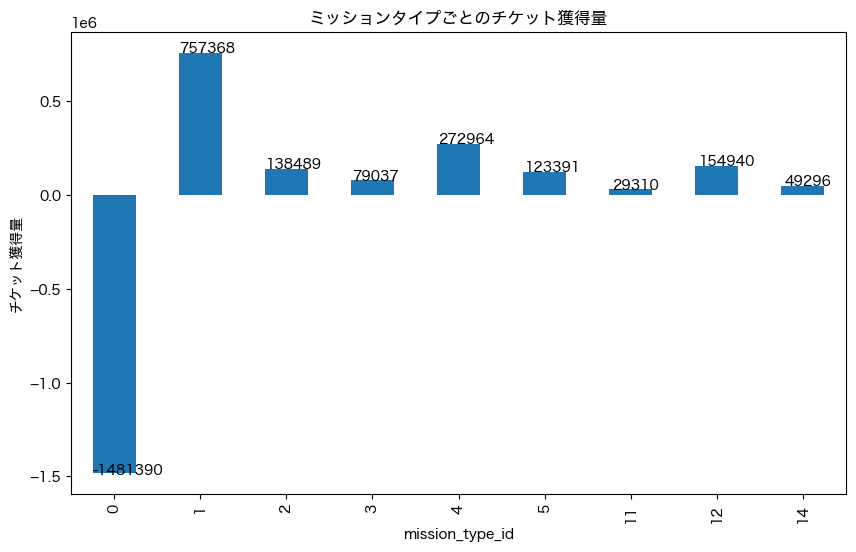

In [37]:
ax = ticket_per_mission_type.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel("チケット獲得量")
ax.set_title("ミッションタイプごとのチケット獲得量")

# 各棒に数値を表示
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

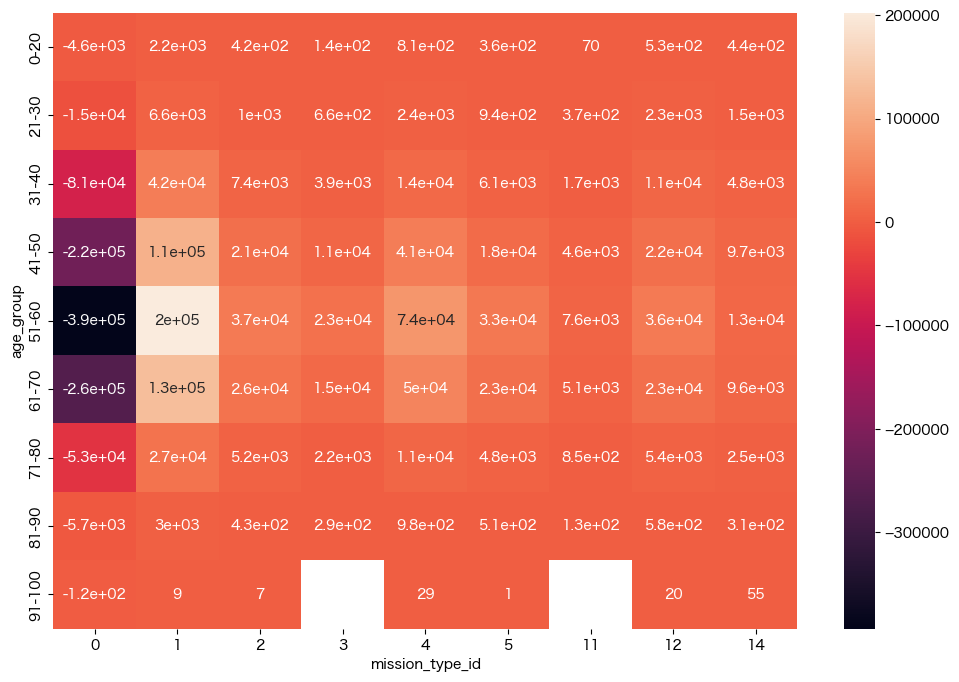

In [38]:
# 図のサイズを調整
plt.figure(figsize=(12, 8)) 

# ヒートマップで年代とミッションタイプごとのチケット獲得量を表示
sns.heatmap(ticket_per_age_mission, annot=True) 
plt.show()

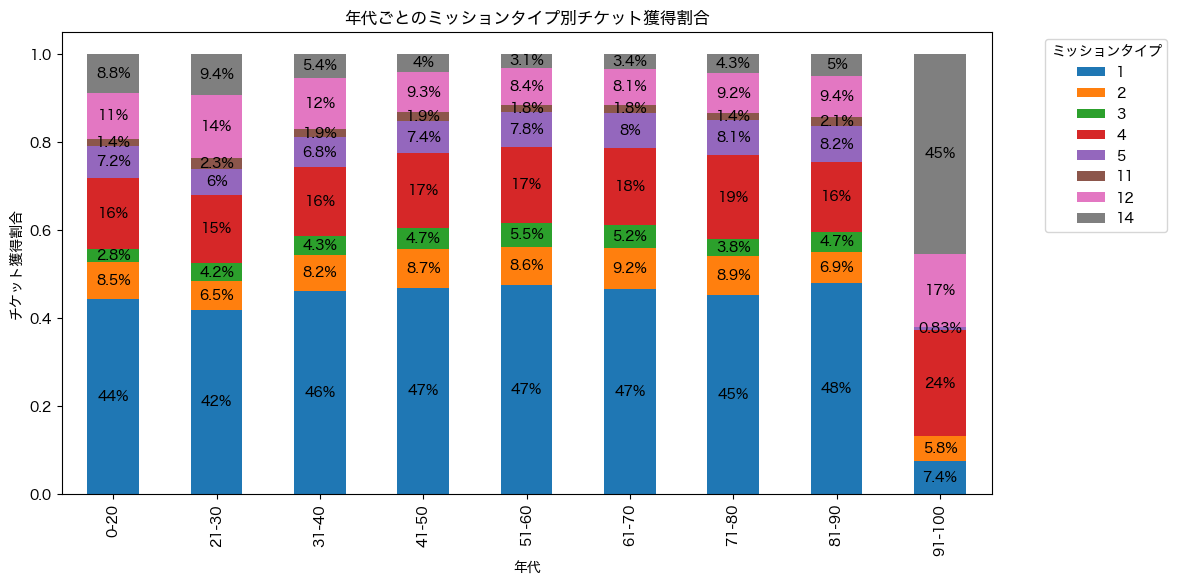

In [40]:
# 年代ごとのミッションタイプ別チケット獲得割合

df_positive_tickets = df_merge[df_merge['add_ticket'] > 0]

# ステップ1: 年代とミッションタイプごとにチケット獲得量を集計
ticket_per_age_mission = df_positive_tickets.groupby(['age_group', 'mission_type_id'], observed=True)['add_ticket'].sum().unstack(fill_value=0)

# ステップ2: 年代ごとの全ミッションタイプのチケット獲得量の合計を計算
total_tickets_per_age = ticket_per_age_mission.sum(axis=1)

# ステップ3: 各年代内での各ミッションタイプのチケット獲得量の割合を計算
ticket_percentage_per_age = ticket_per_age_mission.div(total_tickets_per_age, axis=0)

# 計算結果の可視化

ax = ticket_percentage_per_age.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('年代ごとのミッションタイプ別チケット獲得割合')
plt.xlabel('年代')
plt.ylabel('チケット獲得割合')
plt.legend(title='ミッションタイプ', bbox_to_anchor=(1.05, 1), loc='upper left')

# 各ミッションタイプごとの割合を注釈として追加
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width/2, 
                y + height/2, 
                '{:.2g}%'.format(height * 100), 
                horizontalalignment='center', 
                verticalalignment='center')
plt.show()



## ここまでの示唆
・ミッションタイプごとのチケット獲得量は1位：会員サイトにログイン、２位：RPS持ち込み量、３位：ぐるっとポンに新規会員登録<br>
・年代ごとで、利用者が実施したミッションタイプに傾向や特徴はあるか？<br>
　→ミッション12（＝ぐるっとポンに新規会員登録）は割合がわりとバラけている（統計的有意なばらつき）<br>
　→若者(40歳以下)はミッション12の割合が高い傾向？、ミッション12は2023/8/1以降に新規登録したユーザーが対象だから、最近母親世代以下のアプリ利用が増えたのではないか<br>
　→逆にミッション5の会員サイト通算ログインによるチケット獲得割合は、母親世代以下の方が低いし<br>
　→キャンペーンによる付与であるミッションタイプ14も若者世代の割合が高いということで、最近何かキャンペーンをやったのでは<br>

【一応】検定しておく

In [42]:
from scipy.stats import chi2_contingency

In [43]:
# ミッションタイプ12に焦点を当てた分析を行うためのデータフレーム
mt12_data = df_merge[df_merge['mission_type_id'] == 12]

# 年代ごとのミッションタイプ12のチケット獲得数を集計
mt12_observed = mt12_data.groupby('age_group', observed=True)['add_ticket'].sum()

# 年代ごとの全チケット獲得数を集計
total_observed = df_merge.groupby('age_group', observed=True)['add_ticket'].sum()

# ミッションタイプ12の期待割合を計算（全チケット獲得数に対するミッションタイプ12の割合）
mt12_expected_ratio = mt12_observed.sum() / total_observed.sum()

# 各年代での期待されるミッションタイプ12のチケット獲得数を計算
mt12_expected = total_observed * mt12_expected_ratio

# カイ二乗検定を実行
chi2, p, dof, _ = chi2_contingency(pd.DataFrame({'Observed': mt12_observed, 'Expected': mt12_expected}))

# 結果の出力
print(f"Chi-squared: {chi2:.2f}")
print(f"p-value: {p:.3g}")
print(f"Degrees of freedom: {dof}")

# p値が統計的有意水準（通常0.05）以下かどうかを確認
print("統計的に有意な差がある" if p < 0.05 else "統計的に有意な差がない")



Chi-squared: 450.80
p-value: 2.49e-92
Degrees of freedom: 8
統計的に有意な差がある
